# U.S. Census Bureau: Median gross rent by tract

#### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

---

## Read data

#### Downloaded with [census-data-downloader](https://github.com/datadesk/census-data-downloader)

In [29]:
src = pd.read_csv(
    "data/raw/acs5_2019_mediangrossrent_tracts.csv",
    dtype={"tract": str, "county": str, "state": str, "geoid": str},
)

In [30]:
len(src)

72877

In [31]:
src[["tract_name", "county_name", "state_name"]] = src["name"].str.split(
    ",", expand=True
)

In [32]:
drop_cols = [
    "median_annotation",
    "median_moe",
    "median_moe_annotation",
    "median_moe_annotation",
    "name",
]

In [33]:
src_df = (
    src[src["median"] != -666666666.0]
    .drop(drop_cols, axis=1)
    .sort_values("median", ascending=False)
    .copy()
)

In [34]:
df = src_df[
    [
        "geoid",
        "tract",
        "tract_name",
        "county_name",
        "state_name",
        "median",
    ]
].copy()

#### Just Los Angeles County

In [35]:
lac_df = df[df["county_name"].str.strip() == "Los Angeles County"].copy()

In [39]:
len(lac_df)

In [63]:
lac_df.head()

,geoid,tract,tract_name,county_name,state_name,median
8978,06037134421,134421,Census Tract 1344.21,Los Angeles County,California,3501.0
9709,06037106603,106603,Census Tract 1066.03,Los Angeles County,California,3501.0
6855,06037460800,460800,Census Tract 4608,Los Angeles County,California,3501.0
6510,06037800101,800101,Census Tract 8001.01,Los Angeles County,California,3501.0
6262,06037113102,113102,Census Tract 1131.02,Los Angeles County,California,3501.0


---

## Geography

#### Read U.S. Census tracts in [LA County](https://geohub.lacity.org/datasets/lacounty::census-tracts-2020/explore)

In [69]:
gdf_src = gpd.read_file("../boundaries/los-angeles/Census_Tracts_2020.geojson")

In [70]:
gdf_src.columns = gdf_src.columns.str.lower()
gdf_src.rename(columns={"ct20": "tract"}, inplace=True)

In [71]:
gdf_src.head()

,objectid,tract,label,shapestarea,shapestlength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


#### Get rid of Catalina and San Clemente islands

In [73]:
gdf = gdf_src[(gdf_src["tract"] != "599100") & (gdf_src["tract"] != "599000")].copy()

<AxesSubplot: >

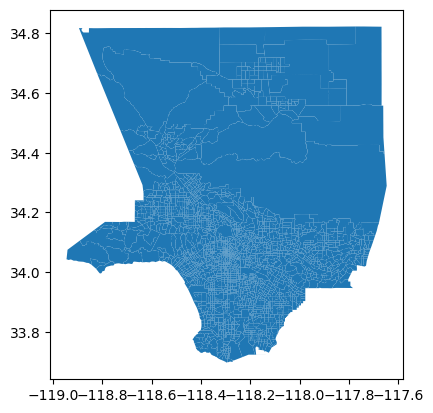

In [74]:
gdf.plot()

---

## Merge

In [78]:
gdf_rent_la = gpd.GeoDataFrame(pd.merge(gdf, lac_df, on="tract"))

<AxesSubplot: >

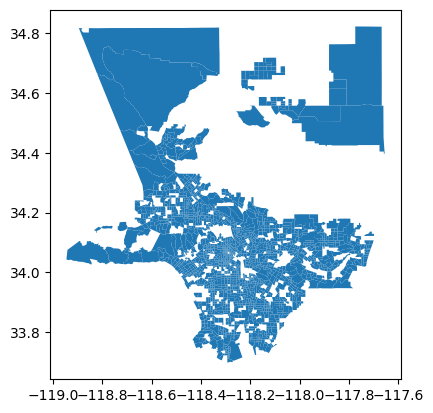

In [80]:
gdf_rent_la.plot()

In [81]:
gdf_rent_la.to_file(
    "data/processed/tracts_medianrent_lacounty.geojson", driver="GeoJSON"
)